### Boston Crime Data Set

### Introduction
Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.

In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins

In [3]:
#loading the csv file
crime = pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/notebook/boston-crime-data/crime.csv', encoding='latin-1')
district = pd.read_csv('boston-crime-data/district_mapping.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#reading the data
crime.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495      NaN   
1                 PROPERTY - LOST      D14            795      NaN   
2       THREATS TO DO BODILY HARM       B2            329      NaN   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92      NaN   
4              AIRCRAFT INCIDENTS       A7             36      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

In [5]:
#Checking the datatypes of the features
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

In [6]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])

In [7]:
crime.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

In [8]:
crime.describe(include=['O']) # 'O' for Objects

INCIDENT_NUMBER               OFFENSE_CODE_GROUP  \
count           327820                           327820   
unique          290156                               67   
top         I162030584  Motor Vehicle Accident Response   
freq                13                            38134   

                  OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
count                          327820   326046         327820     1055   
unique                            244       12            880        1   
top     SICK/INJURED/MEDICAL - PERSON       B2                       Y   
freq                            19360    51288          20920     1055   

       DAY_OF_WEEK    UCR_PART         STREET                  Location  
count       327820      327727         316843                    327820  
unique           7           4           4684                     18255  
top         Friday  Part Three  WASHINGTON ST  (0.00000000, 0.00000000)  
freq         49758      162928          14590                     20632

In [9]:
# join the two dataframe together on DISTRICT
crime_new = pd.merge(crime, district, on = "DISTRICT")

In [10]:
# the newly created dataframe has less rows than the original one, why?
print(crime.shape)
print(crime_new.shape)

(327820, 17)
(326046, 18)


In [11]:
# use left join so we won't lose any records
crime_new = pd.merge(crime, district, on = "DISTRICT", how = "left")

In [12]:
print(crime.shape)
print(crime_new.shape)

(327820, 17)
(327820, 18)


In [13]:
# fill the NA value in SHOOTING column as N
crime_new['SHOOTING'] = crime_new['SHOOTING'].fillna(value='N')

In [14]:
# now check the unique value for SHOOTING column
crime_new['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

### Data profiling

Data profiling is the process of examining the data available from an existing information source (e.g. a database or a file) and collecting statistics or informative summaries about that data. The purpose of these statistics may be to: Find out whether existing data can be easily used for other purposes.

pandas-profiling enables its user to quickly generate a very broadly structured HTML file containing most of what you might need to know before diving into a more specific and individual data exploration

In [15]:
pandas_profiling.ProfileReport(crime_new)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# dataset has duplications, let's check what are they, use duplicated function
crime_new[crime_new.duplicated(subset=None, keep=False)]

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
327487   I152030570-00          3125     Warrant Arrests   
327490   I152030570-00          3125     Warrant Arrests   
327496   I152026775-00          3115  Investigate Person   
327497   I152026775-00          3115  Investigate Person   
327499   I152026488-00          3125     Warrant Arrests   
327500   I152026488-00          3125     Warrant Arrests   
327524   I152006153-00          1849      Drug Violation   
327526   I152006153-00          1849      Drug Violation   
327529   I152004688-00          3125     Warrant Arrests   
327530   I152004688-00          3125     Warrant Arrests   
327552   I142060752-00          2610               Other   
327553   I142060752-00          2610               Other   
327554   I142060752-00          3125     Warrant Arrests   
327555   I142060752-00          3125     Warrant Arrests   
327569   I142049917-00          1402           Vandalism   
327571   I142049917-00          1402           Vandalism   
327610   I142025900-00          3125     Warrant Arrests   
327611   I142025900-00          3125     Warrant Arrests   
327631   I142017108-00          1841      Drug Violation   
327632   I142017108-00          1841      Drug Violation   
327634   I142017108-00          3125     Warrant Arrests   
327635   I142017108-00          3125     Warrant Arrests   
327639   I142014620-00          3125     Warrant Arrests   
327642   I142014620-00          3125     Warrant Arrests   
327658   I140346143-00          1849      Drug Violation   
327659   I140346143-00          1849      Drug Violation   
327685   I140056633-00          3125     Warrant Arrests   
327687   I140056633-00          3125     Warrant Arrests   
327692   I140039570-00          3125     Warrant Arrests   
327693   I140039570-00          3125     Warrant Arrests   
327695   I140036361-00          3125     Warrant Arrests   
327698   I140036361-00          3125     Warrant Arrests   
327707   I130731947-00          2610               Other   
327708   I130731947-00          2610               Other   
327724   I130371627-00          3125     Warrant Arrests   
327725   I130371627-00          3125     Warrant Arrests   
327737   I130202615-00          3125     Warrant Arrests   
327738   I130202615-00          3125     Warrant Arrests   
327750   I130041200-00          3125     Warrant Arrests   
327756   I130041200-00          3125     Warrant Arrests   
327770   I120470733-00           724          Auto Theft   
327771   I120470733-00           724          Auto Theft   
327796   I110177502-00          3125     Warrant Arrests   
327798   I110177502-00          3125     Warrant Arrests   
327806   I090321958-00          3125     Warrant Arrests   
327807   I090321958-00          3125     Warrant Arrests   

                                   OFFENSE_DESCRIPTION DISTRICT  \
327487                                  WARRANT ARREST      E13   
327490                                  WARRANT ARREST      E13   
327496                              INVESTIGATE PERSON       C6   
327497                              INVESTIGATE PERSON       C6   
327499                                  WARRANT ARREST       A1   
327500                                  WARRANT ARREST       A1   
327524            DRUGS - POSS CLASS B - COCAINE, ETC.       C6   
327526            DRUGS - POSS CLASS B - COCAINE, ETC.       C6   
327529                                  WARRANT ARREST       A1   
327530                                  WARRANT ARREST       A1   
327552                                     TRESPASSING       B2   
327553                                     TRESPASSING       B2   
327554                                  WARRANT ARREST       B2   
327555                                  WARRANT ARREST       B2   
327569                                       VANDALISM      C11   
327571                                       VANDALISM      C11   
327610                                  WARRANT

In [17]:
# drop the duplication from dataframe
crime_new = crime_new.drop_duplicates(keep='first')

In [18]:
# check the shape again
crime_new.shape

(327797, 18)

In [19]:
crime_new['DISTRICT_NAME'].value_counts()

Roxbury          51283
Dorchester       43815
South End        43337
Downtown         36728
Mattapan         36399
South Boston     24187
Brighton         20632
Jamaica Plain    17979
Hyde Park        17824
East Boston      13634
Centre Street    13542
Charlestown       6663
Name: DISTRICT_NAME, dtype: int64

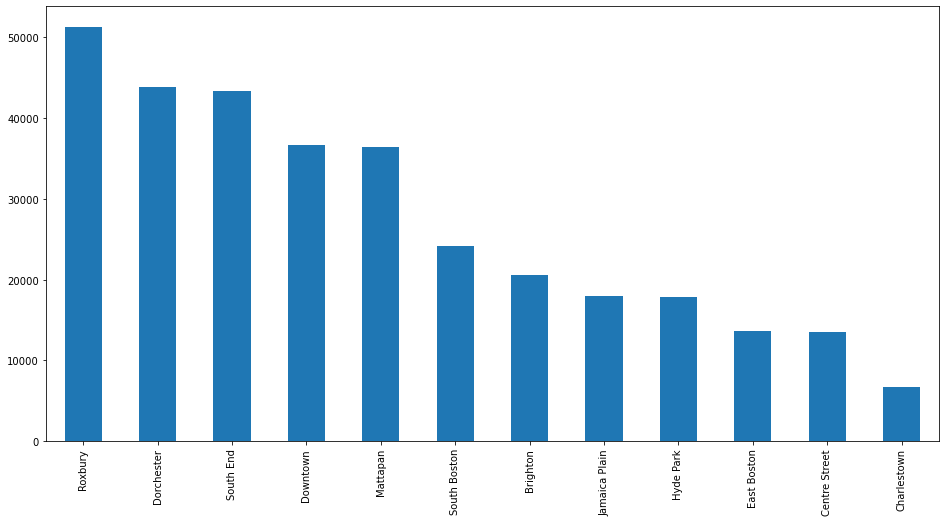

In [20]:
# count crimes by district
plt.figure(figsize=(16,8))
crime_new['DISTRICT_NAME'].value_counts().plot.bar()
plt.show()

<AxesSubplot:>

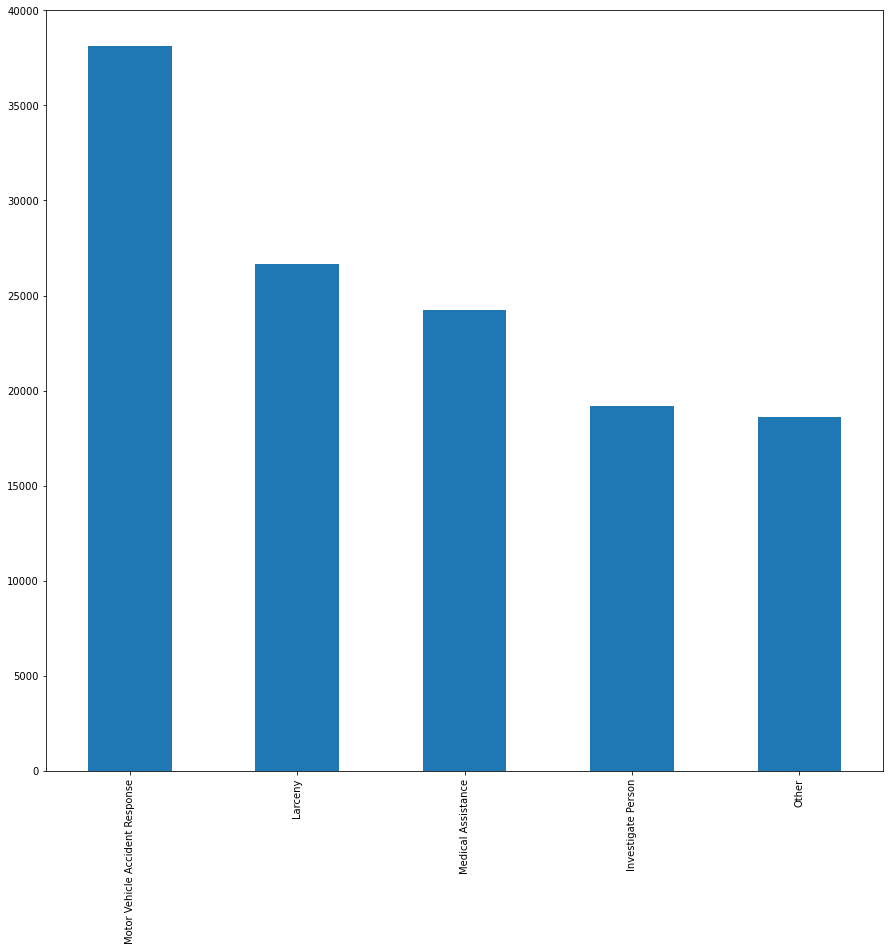

In [21]:
# plot crime count by OFFENSE_CODE_GROUP
plt.figure(figsize=(15,14))
crime_new['OFFENSE_CODE_GROUP'].value_counts().head(5).plot.bar()

<BarContainer object of 5 artists>

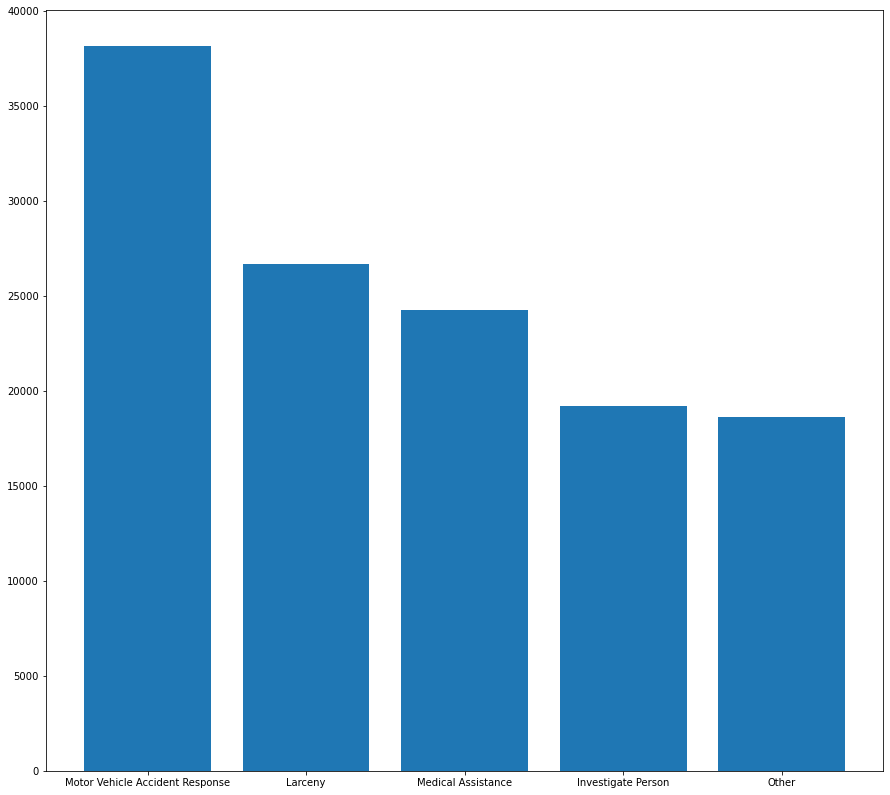

In [22]:
# plot crime count by OFFENSE_CODE_GROUP (another way of doing it)
offense_code_group = crime_new['OFFENSE_CODE_GROUP'].value_counts().reset_index()
plt.figure(figsize=(15,14))
plt.bar(offense_code_group['index'][0:5], offense_code_group['OFFENSE_CODE_GROUP'][0:5])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SHOOTING', ylabel='count'>

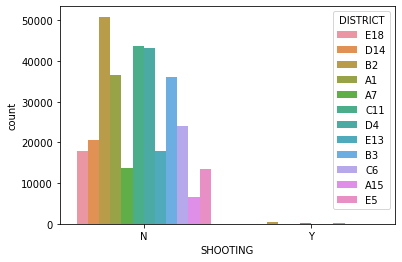

In [23]:
# Which district has reported more number of shootings
sns.countplot("SHOOTING", hue="DISTRICT", data = crime_new)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SHOOTING', ylabel='count'>

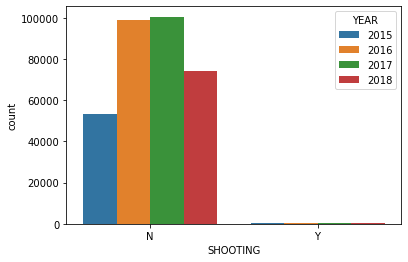

In [24]:
# Which year has reported more number of shootings
sns.countplot("SHOOTING", hue="YEAR", data = crime_new)

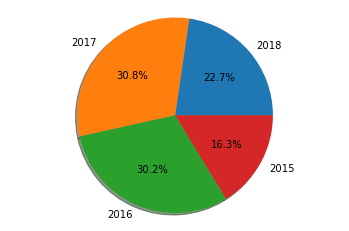

In [25]:
# use pie chart 
labels = crime_new['YEAR'].unique().tolist()
counts = crime_new['YEAR'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SHOOTING', ylabel='count'>

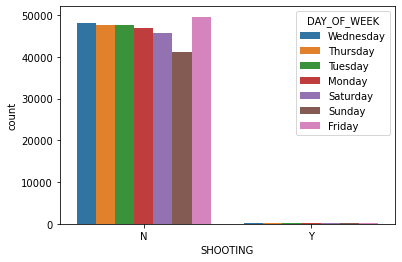

In [26]:
# Which day of the week  has reported more number of shootings
sns.countplot("SHOOTING", hue="DAY_OF_WEEK",data=crime_new)

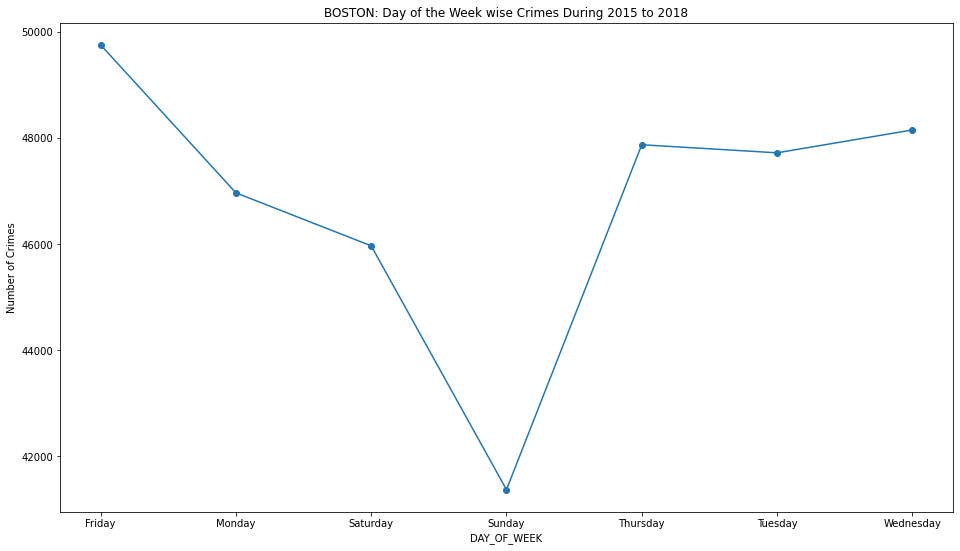

In [27]:
plt.figure(figsize=(16,9))
crime_new.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count().plot(marker = 'o')
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Day of the Week wise Crimes During 2015 to 2018')
plt.show()

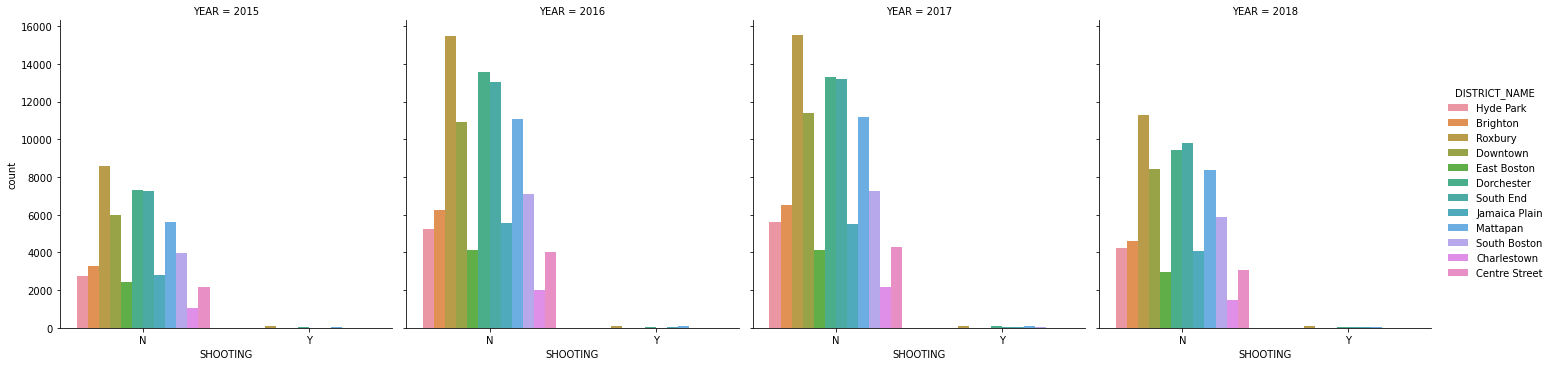

In [28]:
sns.catplot(x="SHOOTING",       # Variable whose distribution (count) is of interest
            hue="DISTRICT_NAME",      # Show distribution, pos or -ve split-wise
            col="YEAR",       # Create two-charts/facets, gender-wise
            data=crime_new,
            kind="count"
            )

In [29]:
#setting up the map for the boston co-ordinates
mapping=folium.Map([42.262607, -71.121186],zoomstart=11)
mapping

In [30]:
#now lets convert the latitudes and longitudes of streets in to a (n,2) matrix
streetMap= crime_new[['Lat','Long']][crime_new['SHOOTING']=='Y']
#replacing the null values with zero
streetMap=streetMap.replace(np.nan,0)
#converting the latitude and longitude to (n,2)matrix
streetMap= streetMap.values
#now adding the heat signatures to the mapping
mapping.add_child(plugins.HeatMap(streetMap,radius=15))
mapping

In [31]:
#lets check the drug related crimes
streetMap=crime_new[['Lat','Long']][crime_new['OFFENSE_CODE_GROUP']=='Drug Violation']
#replacing the null values with zero
streetMap=streetMap.replace(np.nan,0)
#making the (n,2) matrix for [lat,long] values
streetMap=streetMap.values
#injecting heat signature into the map
mapping.add_child(plugins.HeatMap(streetMap,radius=10))